
# 📘 Ridge and Lasso Regression Tutorial

In this tutorial, we will study **Ridge Regression** and **Lasso Regression**, two widely used techniques that extend Linear Regression by adding **regularization**.

Regularization is a method to prevent **overfitting** by penalizing large model coefficients. It adds a penalty term to the loss function of linear regression:

- **Linear Regression Loss (RSS):**
  
  \[ L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

- **Ridge Regression (L2 penalty):**
  
  \[ L_{ridge} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 \]

- **Lasso Regression (L1 penalty):**
  
  \[ L_{lasso} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \]

where:
- $\alpha$ is the **regularization strength**
- Ridge shrinks coefficients **towards zero** but never exactly zero
- Lasso can shrink coefficients **exactly to zero**, thus performing **feature selection**

We will explore these methods step-by-step with examples and visualizations.


# **Introduction to Regularization**

In machine learning, especially in regression, we often face the problem of **overfitting**. This happens when our model learns the training data too well, including its noise, and fails to generalize to new, unseen data.

**Regularization** is a set of techniques used to combat overfitting by adding a penalty term to the model's loss function. This penalty discourages the model from learning overly complex patterns or assigning too much importance to any single feature. The two most common types of regularization for linear models are Ridge (L2) and Lasso (L1).



## 🔍 Geometric Intuition

- **Ridge Regression (L2 penalty)** adds a penalty proportional to the square of coefficients. 
  - Geometrically, it constrains the coefficients to lie within a **circle (L2 ball)**. 
  - This leads to smooth shrinkage of all coefficients.

- **Lasso Regression (L1 penalty)** adds a penalty proportional to the absolute value of coefficients.
  - Geometrically, it constrains the coefficients to lie within a **diamond (L1 ball)**. 
  - Because of the shape, solutions often lie on the **axes**, meaning some coefficients are exactly zero → **sparse models**.

📌 In practice:
- Use **Ridge** when you believe all features are relevant but want to reduce their impact to avoid overfitting.  
- Use **Lasso** when you suspect many features are irrelevant and want the model to automatically perform **feature selection**.


In [3]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [5]:
# Generating synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=100, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)


Shape of training data (X_train): (160, 1)
Shape of testing data (X_test): (40, 1)


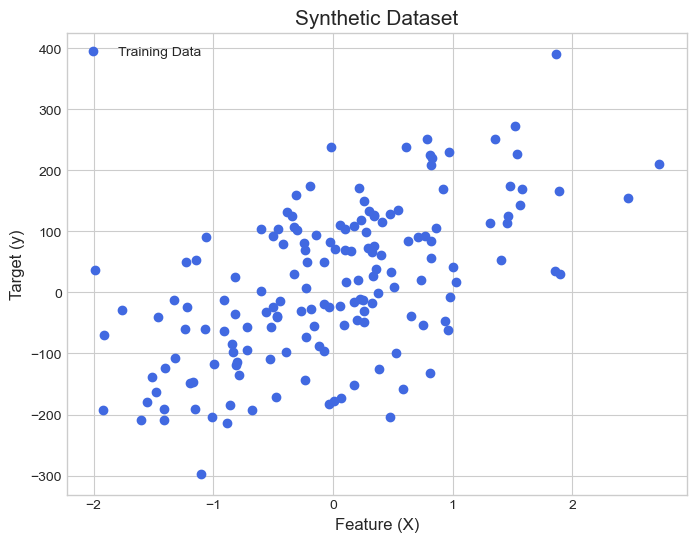

In [7]:
# Visualize the Dataset

# Let's plot our simple dataset to see the relationship between X and y.
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='royalblue', label='Training Data')
plt.xlabel("Feature (X)", fontsize=12)
plt.ylabel("Target (y)", fontsize=12)
plt.title("Synthetic Dataset", fontsize=15)
plt.legend()
plt.show()

**Standard Linear Regression**

First train a standard Linear Regression model. This will serve as our baseline to compare against. The objective of Linear Regression is to minimize the Residual Sum of Squares (RSS).

**Loss Function (RSS):** `L = Σ(yᵢ - ŷᵢ)²`

In [16]:
# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

 **Ridge Regression (L2 Regularization)**

 Ridge Regression adds a penalty term to the loss function that is proportional to the **square of the magnitude of the coefficients**. This is also known as the L2 norm.

 **Loss Function:** `L = Σ(yᵢ - ŷᵢ)² + α * Σ(βⱼ)²`

 - **βⱼ**: The coefficient for the j-th feature.
 - **α (alpha)**: The regularization strength. It's a hyperparameter we need to tune.
   - If `α = 0`, Ridge Regression is the same as Linear Regression.
   - As `α` increases, the coefficients are pushed closer to zero, but they never become exactly zero. This is called "coefficient shrinkage."

In [20]:
# Initialize and train the Ridge model
ridge_reg = Ridge(alpha=200.0)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=200.0)

**Lasso Regression (L1 Regularization)**

Lasso (Least Absolute Shrinkage and Selection Operator) Regression adds a penalty term proportional to the **absolute value of the magnitude of the coefficients** (L1 norm).

**Loss Function:** `L = Σ(yᵢ - ŷᵢ)² + α * Σ|βⱼ|`

The key difference from Ridge is that the L1 penalty can force some coefficients to be **exactly zero**. This makes Lasso useful for **feature selection**, as it effectively removes irrelevant features from the model.


In [23]:
# Initialize and train the Lasso model
lasso_reg = Lasso(alpha=20.0)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=20.0)

In [25]:
# Comparing the Regression Lines
# Get coefficients
linear_coeffs = lin_reg.coef_
ridge_coeffs = ridge_reg.coef_
lasso_coeffs = lasso_reg.coef_

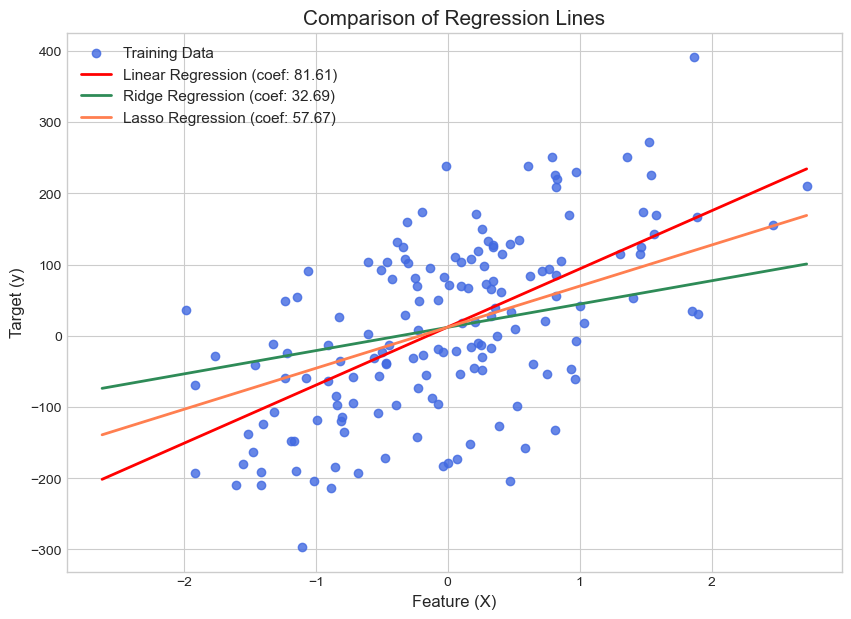

In [27]:
# Now, let's visualize the regression lines learned by each of our three models.

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, color='royalblue', alpha=0.8, label='Training Data')

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_range, lin_reg.predict(x_range), color='red', linewidth=2, label=f'Linear Regression (coef: {linear_coeffs[0]:.2f})')
plt.plot(x_range, ridge_reg.predict(x_range), color='seagreen', linewidth=2, label=f'Ridge Regression (coef: {ridge_coeffs[0]:.2f})')
plt.plot(x_range, lasso_reg.predict(x_range), color='coral', linewidth=2, label=f'Lasso Regression (coef: {lasso_coeffs[0]:.2f})')

plt.xlabel("Feature (X)", fontsize=12)
plt.ylabel("Target (y)", fontsize=12)
plt.title("Comparison of Regression Lines", fontsize=15)
plt.legend(fontsize=11)
plt.show()

In [29]:
print("\nCoefficients from Linear Regression:\n", np.round(linear_coeffs, 2))
print("\nCoefficients from Ridge Regression (alpha=100):\n", np.round(ridge_coeffs, 2))
print("\nCoefficients from Lasso Regression (alpha=10):\n", np.round(lasso_coeffs, 2))


Coefficients from Linear Regression:
 [81.61]

Coefficients from Ridge Regression (alpha=100):
 [32.69]

Coefficients from Lasso Regression (alpha=10):
 [57.67]


In [31]:
#  Evaluating Model Performance
# Let's see how the models perform on the unseen test data using Mean Squared Error (MSE).

# Make predictions on the test set
y_pred_linear = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("\n--- Model Performance on Test Data ---")
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Ridge Regression MSE:  {mse_ridge:.2f}")
print(f"Lasso Regression MSE:  {mse_lasso:.2f}")


--- Model Performance on Test Data ---
Linear Regression MSE: 10938.75
Ridge Regression MSE:  14264.83
Lasso Regression MSE:  11983.01


**The Effect of Alpha**

The choice of `alpha` is critical. Let's quickly see how it affects the single coefficient in our Ridge and Lasso models.

In [ ]:
alphas = np.logspace(-1, 2.5, 100) # Use a wider range of alphas
ridge_coefs_path = []
lasso_coefs_path = []

for a in alphas:
    ridge = Ridge(alpha=a, max_iter=100).fit(X_train, y_train)
    lasso = Lasso(alpha=a, max_iter=100).fit(X_train, y_train)
    ridge_coefs_path.append(ridge.coef_)
    lasso_coefs_path.append(lasso.coef_)

# Convert to numpy arrays for easier plotting
ridge_coefs_path = np.array(ridge_coefs_path)
lasso_coefs_path = np.array(lasso_coefs_path)

# Plotting the coefficient paths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Ridge plot
for i in range(ridge_coefs_path.shape[1]):
    ax1.plot(alphas, ridge_coefs_path[:, i], 'o-')
ax1.set_xscale('log')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Coefficients')
ax1.set_title('Ridge Coefficients as a function of Alpha')
ax1.grid(True)


# Lasso plot
for i in range(lasso_coefs_path.shape[1]):
    ax2.plot(alphas, lasso_coefs_path[:, i], 'o-')
ax2.set_xscale('log')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('Coefficients')
ax2.set_title('Lasso Coefficients as a function of Alpha')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y, coef = make_regression(n_samples=100, n_features=20, n_informative=10, noise=10, coef=True, random_state=42)

alphas = np.logspace(-3, 2, 50)
ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X, y)
    ridge_coefs.append(ridge.coef_)
    
    lasso = Lasso(alpha=a, max_iter=5000).fit(X, y)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(14,6))

# Ridge coefficients path
plt.subplot(1,2,1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge: Coefficient Paths")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient value")

# Lasso coefficients path
plt.subplot(1,2,2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso: Coefficient Paths")
plt.xlabel("Alpha (log scale)")

plt.show()



# 📝 Assignments

### **Assignment 1: Ridge Regression**
- Implement Ridge Regression *without using scikit-learn’s Ridge class*.
- Start from the normal equation of Linear Regression and modify it to include the L2 penalty.
- Compare your manual implementation with `sklearn.linear_model.Ridge` on a dataset.

---

### **Assignment 2: Lasso Regression and Feature Selection**
- Create a dataset with at least 50 features where only 5 are truly informative (you can use `sklearn.datasets.make_regression`).
- Train a Lasso Regression model with different values of `alpha`.
- Plot how many coefficients are exactly zero as alpha increases.
- Explain how Lasso can be used for **automatic feature selection**.
